In [615]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

# Neural Networks
import tensorflow
from tensorflow import keras

# AWS
import boto3

# Model
from sklearn.model_selection import train_test_split

## Downloading Data from a Bucket

In [2]:
!ls ~/.aws

credentials


In [3]:
s3 = boto3.resource("s3")

In [22]:
# Looking at all buckets
for bucket in s3.buckets.all():
    print(bucket)

bucket = s3.Bucket("firearm-image-classification")

s3.Bucket(name='firearm-image-classification')
s3.Bucket(name='jefferson-demo-0106')


In [59]:
# prints the contents of bucket
for s3_file in bucket.objects.all():
    print(s3_file.key)

Assault_Rifles/
Assault_Rifles/007537de01.jpg
Assault_Rifles/0113486613.jpg
Assault_Rifles/01193d63f6.jpg
Assault_Rifles/012b574bcc.jpg
Assault_Rifles/0188186045.jpg
Assault_Rifles/022269aa75.jpg
Assault_Rifles/02a3fa6b83.jpg
Assault_Rifles/033e3eccb8.jpg
Assault_Rifles/038348075a.jpg
Assault_Rifles/04748bf217.jpg
Assault_Rifles/056e4823aa.jpg
Assault_Rifles/0664fc7d5a.jpg
Assault_Rifles/0707e28f74.jpg
Assault_Rifles/083e3b4252.jpg
Assault_Rifles/084bc1a1ea.jpg
Assault_Rifles/086ffaed6b.jpg
Assault_Rifles/0890950291.jpg
Assault_Rifles/08ec7c8486.jpg
Assault_Rifles/0a21ef7c12.jpg
Assault_Rifles/0b190c3738.jpg
Assault_Rifles/0b912be024.jpg
Assault_Rifles/0baaa72977.jpg
Assault_Rifles/0bf99865e4.jpg
Assault_Rifles/0c3d7b77ca.jpg
Assault_Rifles/0c56228502.jpg
Assault_Rifles/0d366429d0.jpg
Assault_Rifles/0dc19ff90b.jpg
Assault_Rifles/0de2e4b138.jpg
Assault_Rifles/0ec494397b.jpg
Assault_Rifles/0f9ad7d467.jpg
Assault_Rifles/0fc987d0f1.jpg
Assault_Rifles/1089aa0edd.jpg
Assault_Rifles/108d53f1f

In [65]:
# Downloading all Objects in the bucket to current directory
!aws s3 sync s3://firearm-image-classification .

download: s3://firearm-image-classification/Assault_Rifles/0113486613.jpg to Assault_Rifles/0113486613.jpg
download: s3://firearm-image-classification/Assault_Rifles/0188186045.jpg to Assault_Rifles/0188186045.jpg
download: s3://firearm-image-classification/Assault_Rifles/01193d63f6.jpg to Assault_Rifles/01193d63f6.jpg
download: s3://firearm-image-classification/Assault_Rifles/022269aa75.jpg to Assault_Rifles/022269aa75.jpg
download: s3://firearm-image-classification/Assault_Rifles/007537de01.jpg to Assault_Rifles/007537de01.jpg
download: s3://firearm-image-classification/Assault_Rifles/056e4823aa.jpg to Assault_Rifles/056e4823aa.jpg
download: s3://firearm-image-classification/Assault_Rifles/033e3eccb8.jpg to Assault_Rifles/033e3eccb8.jpg
download: s3://firearm-image-classification/Assault_Rifles/0707e28f74.jpg to Assault_Rifles/0707e28f74.jpg
download: s3://firearm-image-classification/Assault_Rifles/02a3fa6b83.jpg to Assault_Rifles/02a3fa6b83.jpg
download: s3://firearm-image-classifi

In [546]:
# Downloading Files from s3
# with open('Rifles.jpg', 'wb') as data:
#         bucket.download_fileobj('Assault_Rifles/007537de01.jpg', data)

In [63]:
# bucket.download_file('Assault_Rifles/', "Assault_Rifles")

In [619]:
# Alters pictures
image_gen = keras.preprocessing.image.ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    zca_epsilon=1e-06,
    rotation_range=0.0,
    width_shift_range=0.0,
    height_shift_range=0.0,
    shear_range=0.0,
    zoom_range=0.0,
    channel_shift_range=0.0,
    fill_mode='nearest',
    cval=0.0,
    horizontal_flip=False,
    vertical_flip=False,
    rescale=1./255,
    preprocessing_function=None,
    data_format=None)

In [620]:
# Loading Images
image_gen = image_gen.flow_from_directory(
    "Data",
    target_size=(300, 300),
    color_mode='rgb',
    classes=None,
    class_mode='categorical',
    batch_size=1596,
    shuffle=True,
    seed=123,
    save_to_dir=None,
    save_prefix='',
    save_format='png',
    follow_links=False,
    interpolation='nearest')

Found 1596 images belonging to 7 classes.


In [621]:
# Data Classes
image_gen.class_indices  # From directory (the way it was labeled)

{'.ipynb_checkpoints': 0,
 'Assault_Rifles': 1,
 'Camera_Feed': 2,
 'Handguns': 3,
 'Holstered_Guns': 4,
 'People_Holding_Handguns': 5,
 'People_Holding_Rifles': 6}

In [622]:
image_gen.image_shape

(300, 300, 3)

## Images and Lables

In [623]:
# split images and labels
images, labels = next(image_gen)
images.shape, labels.shape

((1596, 300, 300, 3), (1596, 7))

## Showing Images

Classes:{'.ipynb_checkpoints': 0, 'Assault_Rifles': 1, 'Camera_Feed': 2, 'Handguns': 3, 'Holstered_Guns': 4, 'People_Holding_Handguns': 5, 'People_Holding_Rifles': 6}
[0. 0. 1. 0. 0. 0. 0.]


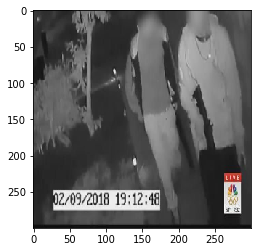

In [666]:
def show_image(n):
    
    print(f"Classes:{image_gen.class_indices}")
    plt.imshow(images[n])
    print(labels[n])
    
show_image(900)

## Train and Test Split

In [626]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=41)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1276, 300, 300, 3), (320, 300, 300, 3), (1276, 7), (320, 7))

In [651]:
# Convenlutional Neural Network Model
cnn = keras.models.Sequential()

cnn.add(keras.layers.Conv2D(64, (3, 3),
                      activation='relu',
                      input_shape=(300, 300,  3),
                      padding='SAME'))
# 64 bias parameters
# 64 * (3 * 3 * 3) weight parametrs
# Output is 64*224*224
cnn.add(keras.layers.MaxPooling2D((2, 2)))
# Output is 64*112*112
cnn.add(keras.layers.Conv2D(32, (3, 3), activation='relu'))
# 32 bias parameters
# 32 * (3*3*64)
# Output is 32*112*112
cnn.add(keras.layers.MaxPooling2D((2, 2)))
cnn.add(keras.layers.Flatten())
cnn.add(keras.layers.Dense(32, activation='relu'))
cnn.add(keras.layers.Dense(7, activation='sigmoid'))

cnn.compile(loss='binary_crossentropy',
            optimizer="sgd",
            metrics=['acc'])

In [652]:
saving_weights = keras.callbacks.ModelCheckpoint(
    'weights.{epoch:02d}-{val_loss:.2f}.hdf5',
    monitor='val_loss', verbose=0, save_best_only=False,
    save_weights_only=False, mode='auto', period=10
)

In [653]:
reduce_lr = keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss', factor=0.1, patience=20,
    verbose=0, mode='auto', min_lr=0)

In [654]:
# If there are problems with input data then it will stop it
nan_problem = keras.callbacks.TerminateOnNaN()

In [659]:
# Stops Epochs when modeling stops to improve
early_stop = keras.callbacks.EarlyStopping(
    monitor='val_loss', min_delta=0, patience=20,
    verbose=0, mode='auto')

In [656]:
print(cnn.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 300, 300, 64)      1792      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 150, 150, 64)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 148, 148, 32)      18464     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 175232)            0         
_________________________________________________________________
dense_5 (Dense)              (None, 32)                5607456   
_________________________________________________________________
dense_6 (Dense)              (None, 7)                 231       
Total para

In [657]:
cnn1 = cnn.fit(X_train,
               y_train,
               epochs=10,
               batch_size=100,
               callbacks=[early_stop, nan_problem, reduce_lr, saving_weights])

Epoch 1/10
1276/1276 [==============================]1276/1276 [==============================] - 134s 105ms/step - loss: 0.4475 - acc: 0.8267


--- Logging error ---
Traceback (most recent call last):
  File "/Users/zakijefferson/opt/anaconda3/envs/learn-env/lib/python3.6/logging/__init__.py", line 994, in emit
    msg = self.format(record)
  File "/Users/zakijefferson/opt/anaconda3/envs/learn-env/lib/python3.6/logging/__init__.py", line 840, in format
    return fmt.format(record)
  File "/Users/zakijefferson/opt/anaconda3/envs/learn-env/lib/python3.6/logging/__init__.py", line 577, in format
    record.message = record.getMessage()
  File "/Users/zakijefferson/opt/anaconda3/envs/learn-env/lib/python3.6/logging/__init__.py", line 338, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "/Users/zakijefferson/opt/anaconda3/envs/learn-env/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/Users/zakijefferson/opt/anaconda3/envs/learn-env/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File 


Epoch 2/10
1276/1276 [==============================]1276/1276 [==============================] - 145s 114ms/step - loss: 0.3745 - acc: 0.8566


--- Logging error ---
Traceback (most recent call last):
  File "/Users/zakijefferson/opt/anaconda3/envs/learn-env/lib/python3.6/logging/__init__.py", line 994, in emit
    msg = self.format(record)
  File "/Users/zakijefferson/opt/anaconda3/envs/learn-env/lib/python3.6/logging/__init__.py", line 840, in format
    return fmt.format(record)
  File "/Users/zakijefferson/opt/anaconda3/envs/learn-env/lib/python3.6/logging/__init__.py", line 577, in format
    record.message = record.getMessage()
  File "/Users/zakijefferson/opt/anaconda3/envs/learn-env/lib/python3.6/logging/__init__.py", line 338, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "/Users/zakijefferson/opt/anaconda3/envs/learn-env/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/Users/zakijefferson/opt/anaconda3/envs/learn-env/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File 


Epoch 3/10
1276/1276 [==============================]1276/1276 [==============================] - 129s 101ms/step - loss: 0.3689 - acc: 0.8533


--- Logging error ---
Traceback (most recent call last):
  File "/Users/zakijefferson/opt/anaconda3/envs/learn-env/lib/python3.6/logging/__init__.py", line 994, in emit
    msg = self.format(record)
  File "/Users/zakijefferson/opt/anaconda3/envs/learn-env/lib/python3.6/logging/__init__.py", line 840, in format
    return fmt.format(record)
  File "/Users/zakijefferson/opt/anaconda3/envs/learn-env/lib/python3.6/logging/__init__.py", line 577, in format
    record.message = record.getMessage()
  File "/Users/zakijefferson/opt/anaconda3/envs/learn-env/lib/python3.6/logging/__init__.py", line 338, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "/Users/zakijefferson/opt/anaconda3/envs/learn-env/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/Users/zakijefferson/opt/anaconda3/envs/learn-env/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File 


Epoch 4/10
1276/1276 [==============================]1276/1276 [==============================] - 129s 101ms/step - loss: 0.3656 - acc: 0.8501


--- Logging error ---
Traceback (most recent call last):
  File "/Users/zakijefferson/opt/anaconda3/envs/learn-env/lib/python3.6/logging/__init__.py", line 994, in emit
    msg = self.format(record)
  File "/Users/zakijefferson/opt/anaconda3/envs/learn-env/lib/python3.6/logging/__init__.py", line 840, in format
    return fmt.format(record)
  File "/Users/zakijefferson/opt/anaconda3/envs/learn-env/lib/python3.6/logging/__init__.py", line 577, in format
    record.message = record.getMessage()
  File "/Users/zakijefferson/opt/anaconda3/envs/learn-env/lib/python3.6/logging/__init__.py", line 338, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "/Users/zakijefferson/opt/anaconda3/envs/learn-env/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/Users/zakijefferson/opt/anaconda3/envs/learn-env/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File 


Epoch 5/10
1276/1276 [==============================]1276/1276 [==============================] - 126s 99ms/step - loss: 0.3548 - acc: 0.8594


--- Logging error ---
Traceback (most recent call last):
  File "/Users/zakijefferson/opt/anaconda3/envs/learn-env/lib/python3.6/logging/__init__.py", line 994, in emit
    msg = self.format(record)
  File "/Users/zakijefferson/opt/anaconda3/envs/learn-env/lib/python3.6/logging/__init__.py", line 840, in format
    return fmt.format(record)
  File "/Users/zakijefferson/opt/anaconda3/envs/learn-env/lib/python3.6/logging/__init__.py", line 577, in format
    record.message = record.getMessage()
  File "/Users/zakijefferson/opt/anaconda3/envs/learn-env/lib/python3.6/logging/__init__.py", line 338, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "/Users/zakijefferson/opt/anaconda3/envs/learn-env/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/Users/zakijefferson/opt/anaconda3/envs/learn-env/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File 


Epoch 6/10
1276/1276 [==============================]1276/1276 [==============================] - 128s 100ms/step - loss: 0.3525 - acc: 0.8578


--- Logging error ---
Traceback (most recent call last):
  File "/Users/zakijefferson/opt/anaconda3/envs/learn-env/lib/python3.6/logging/__init__.py", line 994, in emit
    msg = self.format(record)
  File "/Users/zakijefferson/opt/anaconda3/envs/learn-env/lib/python3.6/logging/__init__.py", line 840, in format
    return fmt.format(record)
  File "/Users/zakijefferson/opt/anaconda3/envs/learn-env/lib/python3.6/logging/__init__.py", line 577, in format
    record.message = record.getMessage()
  File "/Users/zakijefferson/opt/anaconda3/envs/learn-env/lib/python3.6/logging/__init__.py", line 338, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "/Users/zakijefferson/opt/anaconda3/envs/learn-env/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/Users/zakijefferson/opt/anaconda3/envs/learn-env/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File 


Epoch 7/10
1276/1276 [==============================]1276/1276 [==============================] - 136s 107ms/step - loss: 0.3580 - acc: 0.8513


--- Logging error ---
Traceback (most recent call last):
  File "/Users/zakijefferson/opt/anaconda3/envs/learn-env/lib/python3.6/logging/__init__.py", line 994, in emit
    msg = self.format(record)
  File "/Users/zakijefferson/opt/anaconda3/envs/learn-env/lib/python3.6/logging/__init__.py", line 840, in format
    return fmt.format(record)
  File "/Users/zakijefferson/opt/anaconda3/envs/learn-env/lib/python3.6/logging/__init__.py", line 577, in format
    record.message = record.getMessage()
  File "/Users/zakijefferson/opt/anaconda3/envs/learn-env/lib/python3.6/logging/__init__.py", line 338, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "/Users/zakijefferson/opt/anaconda3/envs/learn-env/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/Users/zakijefferson/opt/anaconda3/envs/learn-env/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File 


Epoch 8/10
1276/1276 [==============================]1276/1276 [==============================] - 131s 103ms/step - loss: 0.3496 - acc: 0.8551


--- Logging error ---
Traceback (most recent call last):
  File "/Users/zakijefferson/opt/anaconda3/envs/learn-env/lib/python3.6/logging/__init__.py", line 994, in emit
    msg = self.format(record)
  File "/Users/zakijefferson/opt/anaconda3/envs/learn-env/lib/python3.6/logging/__init__.py", line 840, in format
    return fmt.format(record)
  File "/Users/zakijefferson/opt/anaconda3/envs/learn-env/lib/python3.6/logging/__init__.py", line 577, in format
    record.message = record.getMessage()
  File "/Users/zakijefferson/opt/anaconda3/envs/learn-env/lib/python3.6/logging/__init__.py", line 338, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "/Users/zakijefferson/opt/anaconda3/envs/learn-env/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/Users/zakijefferson/opt/anaconda3/envs/learn-env/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File 


Epoch 9/10
1276/1276 [==============================]1276/1276 [==============================] - 134s 105ms/step - loss: 0.3591 - acc: 0.8479


--- Logging error ---
Traceback (most recent call last):
  File "/Users/zakijefferson/opt/anaconda3/envs/learn-env/lib/python3.6/logging/__init__.py", line 994, in emit
    msg = self.format(record)
  File "/Users/zakijefferson/opt/anaconda3/envs/learn-env/lib/python3.6/logging/__init__.py", line 840, in format
    return fmt.format(record)
  File "/Users/zakijefferson/opt/anaconda3/envs/learn-env/lib/python3.6/logging/__init__.py", line 577, in format
    record.message = record.getMessage()
  File "/Users/zakijefferson/opt/anaconda3/envs/learn-env/lib/python3.6/logging/__init__.py", line 338, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "/Users/zakijefferson/opt/anaconda3/envs/learn-env/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/Users/zakijefferson/opt/anaconda3/envs/learn-env/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File 


Epoch 10/10
1200/1276 [===========================>..]1200/1276 [===========================>..] - ETA: 7s - loss: 0.3442 - acc: 0.8595 

--- Logging error ---
Traceback (most recent call last):
  File "/Users/zakijefferson/opt/anaconda3/envs/learn-env/lib/python3.6/logging/__init__.py", line 994, in emit
    msg = self.format(record)
  File "/Users/zakijefferson/opt/anaconda3/envs/learn-env/lib/python3.6/logging/__init__.py", line 840, in format
    return fmt.format(record)
  File "/Users/zakijefferson/opt/anaconda3/envs/learn-env/lib/python3.6/logging/__init__.py", line 577, in format
    record.message = record.getMessage()
  File "/Users/zakijefferson/opt/anaconda3/envs/learn-env/lib/python3.6/logging/__init__.py", line 338, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "/Users/zakijefferson/opt/anaconda3/envs/learn-env/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/Users/zakijefferson/opt/anaconda3/envs/learn-env/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File 

KeyError: 'val_loss'

In [660]:
results_train = cnn.evaluate(X_train, y_train)
results_test = cnn.evaluate(X_test, y_test)
print(results_train, results_test)

1276/1276 [==============================]1276/1276 [==============================] - 34s 27ms/step

320/320 [==============================]320/320 [==============================] - 10s 30ms/step

[0.35796436966399786, 0.862516825101966] [0.3687542140483856, 0.8593750178813935]
